Submision project Mechine Learning

Nama     : Ade Nehemia Setiawan

Email    : adenehemia678@gmail.com

Nomor Hp : 085266939205

Nomor WA : 087733208895

Asal Kota: Provisin Jambi 

In [ ]:
import tensorflow as tf
# cek versi Tensorflow yang dimiliki
print(tf.__version__)

2.4.1


In [ ]:
 # untuk mempersiapkan datanya 
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

  

--2021-05-03 07:36:01--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.74MB/s    in 64s     

2021-05-03 07:37:06 (4.84 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [ ]:
import os

base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')

# membuat direktori train didalam ddirektori rockpaperscissors
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'val')
# membuat direktori validation direktori rockpaperscissors
os.mkdir(validation_dir)

rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')



In [ ]:
import os
train_rock = os.path.join(train_dir, 'rock')
# membuat direktori rock didalam rirektori train
os.mkdir(train_rock)

train_paper = os.path.join(train_dir, 'paper')
# membuat direktori paper didalam direktori train
os.mkdir(train_paper)

train_scissors = os.path.join(train_dir, 'scissors')
# membuat direktori scissors didalam direktori train
os.mkdir(train_scissors)

validation_rock = os.path.join(validation_dir, 'rock')
# membuat direktori rock didalam direktori  validation
os.mkdir(validation_rock)

validation_paper = os.path.join(validation_dir, 'paper')
# membuat direktori paper didalam direktori validation
os.mkdir(validation_paper)

validation_scissors = os.path.join(validation_dir, 'scissors')
# membuat direktori scissors didalam direktori validation
os.mkdir(validation_scissors)

In [10]:
from sklearn.model_selection import train_test_split

# memecah setiap direktori menjadi data train dan data validasi(validation 40% of dataset)
train_rock_dir, validation_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.40)
train_paper_dir, validation_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.40)
train_scissors_dir, validation_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.40)

In [ ]:
import os
import shutil

for file in train_rock_dir:
  # mengcopy data gambar rock kedalam direktori rock yang ada didalam direktori train untuk pelatihan
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock, file))

for file in train_paper_dir:
  # mengcopy data gambar paper ke dalam direktori papaer yang ada didalam direktori train  untuk pelatihan
  shutil.copy(os.path.join(paper_dir,file), os.path.join(train_paper,file))

for file in train_scissors_dir:
  # mengcopy data gambar scissors ke dalam direktori scissors yang ada didalam direktori train untuk pelatihan
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(train_scissors,file))

for file in validation_rock_dir:
  # mengcopy data gambar rock kedalam direktori rock yang ada didalam direktori val untuk validation
  shutil.copy(os.path.join(rock_dir, file), os.path.join(validation_rock,file))

for file in validation_paper_dir:
  # mengcopy data gambar paper kedalam direktori paper yang ada didalam direktori val untuk validation
  shutil.copy(os.path.join(paper_dir,file), os.path.join(validation_paper,file))

for file in validation_scissors_dir:
  # mengcopy data gambar scissors kedalam direktori scissors yang ada didalam direktori val untuk validation
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(validation_scissors,file))

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data latih
    target_size=(150,150), # menggubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size= 32,
    # karena kita merupakan masalah klarifikasi 3 kelas maka menggunakan class_mode = 'categorical'
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, # direktori data validasi
    target_size = (150,150), # menggubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size = 32,
    # karena kita merupakan masalah klarifikasi 3 kelas maka menggunakan class_mode = 'categorical'
    class_mode = 'categorical'
)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  #tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

# latih model dengan dengan model.fit
model.fit(
    train_generator,
    steps_per_epoch=25, # berapa batch yang akan dieksekusi pada setiap epoch
    epochs=20, # berapa batch yang akan dieksekusi pada setiap epoch
    validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
    validation_steps=5, # berapa batch yang akan dieksekusi pada setiap epoch
    verbose=2
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)       0         
_____________________________________

Saving 17HZDUFSVPxcar99.png to 17HZDUFSVPxcar99 (1).png
17HZDUFSVPxcar99.png
scissors


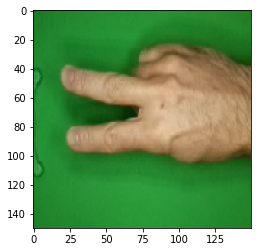

In [13]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


uploaded = files.upload()
for fn in uploaded.keys():
  
  # predicting images
  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('Paper')
  elif classes[0,1]!=0:
    print('Rock')
  else:
    print('scissors')
